In [7]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

#for mem
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
#import data

long_df=pd.read_csv('data/long_df.csv')

long_df_wtot=pd.read_csv('data/long_df_wtot.csv')
tot_df = long_df_wtot[long_df_wtot['celltype']=='total']

celltypes=['TN', 'TSCM','TCM', 'TTM','TEM'] #cell type names

cellnames=['$\mathrm{T_N}$','$\mathrm{T_{SCM}}$','$\mathrm{T_{CM}}$','$\mathrm{T_{TTM}}$','$\mathrm{T_{EM}}$']
cellcolors=['deepskyblue','green','gold','navy','crimson']
dtype_l=['DNApmsub','DNApmCD4','RNApmCD4','iDNApmL','caRNApmL']

dtype_names=['Integrated HIV DNA per \n mil cells of subset X','Integrated HIV DNA per \n mil CD4+ T cells']

In [3]:
#also grab subset proportions
sx_df=pd.read_csv('data/long_df_Sx.csv')

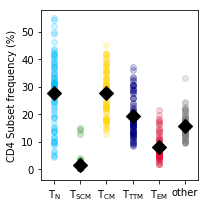

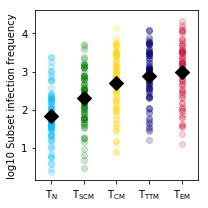

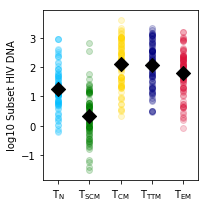

In [4]:
#plot data over all individuals and all times!

#proportion of CD4+ T cells in all
plt.figure(figsize=(3,3))
Sx_l=[]
for ic,ct in enumerate(celltypes):
    y=np.array(sx_df[sx_df['celltype']==ct]['subsetpropSx'])
    plt.scatter(np.ones(len(y))*(ic+1),y,c=cellcolors[ic],alpha=0.2)
    plt.scatter((ic+1),np.nanmean(y),marker='D',color='k',s=100)
    Sx_l.append(y)
y=100-np.nansum(Sx_l,0)
y=y[y<100]
plt.scatter(np.ones(len(y))*(ic+2),y,c='gray',alpha=0.2)
plt.scatter((ic+2),np.nanmean(y),marker='D',color='k',s=100)
plt.xlim([0.5,6.5])
plt.ylabel('CD4 Subset frequency (%)',fontsize=10)
plt.xticks(np.arange(1,7),cellnames+['other'])
plt.tight_layout()
plt.savefig('data_Sx.pdf',dpi=600)

#per million subset cells
plt.figure(figsize=(3,3))
for ic,ct in enumerate(celltypes):
    y=np.log10(long_df[long_df['celltype']==ct]['DNApmsub'])
    plt.scatter(np.ones(len(y))*(ic+1),y,c=cellcolors[ic],alpha=0.2)
    plt.scatter((ic+1),np.nanmean(y),marker='D',color='k',s=100)
#plt.semilogy()
plt.xlim([0.5,5.5])
plt.ylabel('log10 Subset infection frequency',fontsize=10)
plt.xticks(np.arange(1,6),cellnames)
plt.tight_layout()
plt.savefig('data_fx.pdf',dpi=600)

#per million CD4 cells
plt.figure(figsize=(3,3))
for ic,ct in enumerate(celltypes):
    y=np.log10(long_df[long_df['celltype']==ct]['DNApmCD4'])
    plt.scatter(np.ones(len(y))*(ic+1),y,c=cellcolors[ic],alpha=0.2)
    plt.scatter((ic+1),np.nanmean(y),marker='D',color='k',s=100)
plt.xlim([0.5,5.5])
plt.ylabel('log10 Subset HIV DNA',fontsize=10)
plt.xticks(np.arange(1,6),cellnames)
plt.tight_layout()
plt.savefig('figures/data_Hx.pdf',dpi=600)


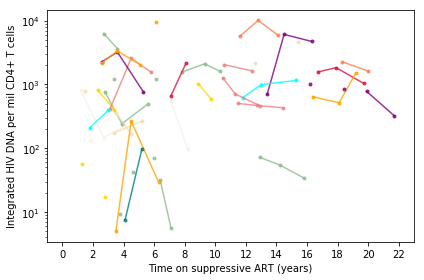

In [6]:
#plot total CD4+ data relative to initiation of ART
#from charlines raw data

#make colors based on time pre ART
z=np.array(tot_df[tot_df['measurement_num']==1]['preART_months'])
#z=np.log10(tot_df[tot_df['measurement_num']==1]['preART_months'])

#cz = cm.Blues(z)
#cz = cm.jet(z)

plt.figure(figsize=(6,4))
cz_l=[]
for ip,p in enumerate(tot_df['pat_id'].unique()):

    tdf=tot_df[tot_df['pat_id']==p]
    x,y=tdf['time_postART_years'],tdf['DNApmCD4']
    
    if z[ip]<1:
        cz='linen'
    elif z[ip]<2:
        cz='wheat'
    elif z[ip]<3:
        cz='gold'
    elif z[ip]<6:
        cz='darkseagreen'
    elif z[ip]<12:
        cz='teal'
    elif z[ip]<24:
        cz='aqua'
    elif z[ip]<3*12:
        cz='orange'
    elif z[ip]<5*12:
        cz='lightcoral'
    elif z[ip]<7*12:
        cz='coral'
    elif z[ip]<10*12:
        cz='crimson'
    else:
        cz='purple'
    plt.plot(x,y,'-o',color=cz,alpha=0.8,markersize=3)#,label=p)#,color=cz_list[pind])
    
    cz_l.append(cz)
    
plt.ylabel('Integrated HIV DNA per mil CD4+ T cells')
plt.xticks(range(0,23,2))
plt.xlim([-1,23])
plt.xlabel('Time on suppressive ART (years)')
plt.semilogy()
#plt.colorbar(cz)
plt.tight_layout()
plt.savefig('figures/longitudinal_all_totCD4_earlylate.pdf',dpi=600)


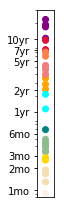

In [8]:
plt.figure(figsize=(1,3))
plt.scatter(np.ones(len(cz_l)),z,c=cz_l)
plt.semilogy()
plt.xticks([])
plt.yticks([1,2,3,6,12,24,5*12,7*12,10*12],['1mo','2mo','3mo','6mo','1yr','2yr','5yr','7yr','10yr'])
plt.ylim([0.8,300])
plt.tight_layout()
plt.savefig('figures/longitudinal_all_totCD4_earlylate_cbar.pdf',dpi=600)


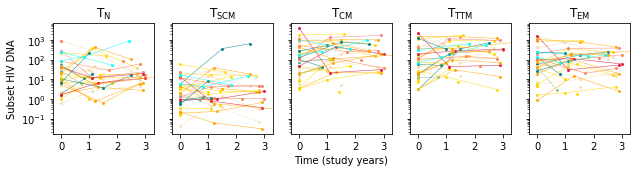

In [9]:
#plot subsets over 3 years, colored by total time on ART
#make colors based on time on ART

fig,axarr=plt.subplots(1,5,figsize=(9,2.5),sharex=True,sharey=True)
for ic,ct in enumerate(celltypes):
    ax=axarr[ic]
    for ip,p in enumerate(long_df['pat_id'].unique()):
        tdf=long_df[(long_df['pat_id']==p) & (long_df['celltype']==ct)]
        
        z=tdf['time_postART_years'].iloc[0]
        
        if z<1:
            cz='linen'
        elif z<3:
            cz='wheat'
        elif z<5:
            cz='gold'
        elif z<7:
            cz='darkseagreen'
        elif z<9:
            cz='teal'
        elif z<11:
            cz='aqua'
        elif z<13:
            cz='orange'
        elif z<15:
            cz='lightcoral'
        elif z<17:
            cz='coral'
        elif z<19:
            cz='crimson'
        else:
            cz='purple'
        
        ax.semilogy(tdf['time_postART_years']-tdf['time_postART_years'].iloc[0],tdf['DNApmCD4'],
                    ls='-',marker='o',lw=0.5,markersize=2,alpha=0.9,color=cz)
        
    ax.set_title(cellnames[ic])

axarr[2].set_xlabel('Time (study years)')
axarr[0].set_ylabel('Subset HIV DNA')
axarr[0].set_xticks(range(5))
axarr[0].set_xlim([-0.3,3.3])

plt.tight_layout()    
plt.savefig('figures/subsetHIVDNAcoloredbyARTtime.pdf',dpi=600)

In [12]:
long_df.columns

Index(['pat_id', 'celltype', 'measurement_num', 'celltype_num', 'DNApmCD4',
       'RNApmCD4', 'DNApmsub', 'preART_months', 'time_postART_years',
       'Age_years', 'cellular_hl_days', 'poolsize_cells/mLblood', 'GiniInd',
       'TRECs', 'IL7', 'IL15', 'pat_id_num', 'iDNApmL', 'caRNApmL'],
      dtype='object')

In [63]:
#make an extra data frame for MEM

idf = pd.DataFrame()
idf['pid']=long_df['pat_id']
idf['Age_mo']=long_df['Age_years']*12
idf['ART_mo']=long_df['time_postART_years']*12
idf['lT']=np.log(long_df['poolsize_cells/mLblood']) #put on natural log scale
idf['lf']=np.log(long_df['DNApmsub']) #put on natural log scale
idf['lH']=np.log(long_df['DNApmCD4']) #put on natural log scale
idf['celltype']=long_df['celltype']

#also add study mo
studytime=pd.DataFrame()
for ip,pid in enumerate(idf['pid'].unique()):
    tdf = idf[idf['pid']==pid]
    tdf['study_mo'] = tdf['ART_mo']-np.min(tdf['ART_mo'])
    studytime=studytime.append(tdf)


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


TN lT [135.42120727  80.18888671 435.12700375]
TN lf [-353.69087775  157.62484762  -83.34144012]
TN lH [-680.64438471  121.12341762  -89.33010985]
TSCM lT [133.1534056   76.98549473 492.41453174]
TSCM lf [-1961.77191341   116.13432629  -103.83994856]
TSCM lH [6916.83629394   96.38357649  -99.14672292]
TCM lT [ 426.62862858  249.8151916  1459.94179386]
TCM lf [-113.26024423  839.50695303  -53.05146119]
TCM lH [-104.38420829 1971.94245801  -50.84633604]
TTM lT [  609.18737302   273.86709126 -2714.85292301]
TTM lf [-175.43168675  243.80639334  -64.50753839]
TTM lH [  -94.53797713 -2092.91338914   -48.36123963]
TEM lT [  389.19785161   170.05853971 -1348.52031371]
TEM lf [-791.93303258  113.61161106  -88.28164206]
TEM lH [-134.61101029  332.59355073  -55.97756887]


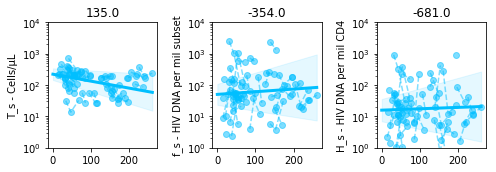

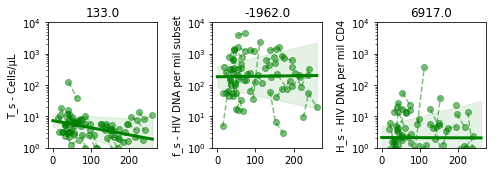

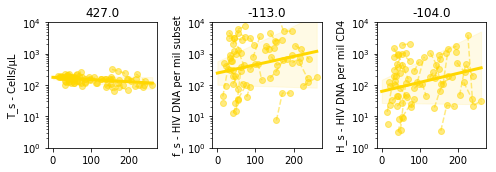

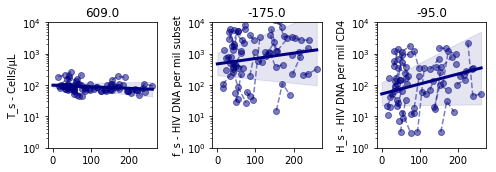

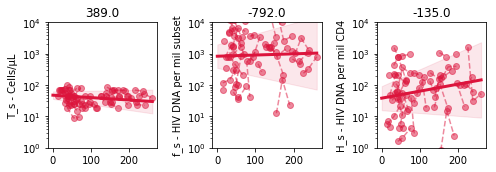

In [68]:
#loop through and fit
mml=[]
mmlfull=[]

minARTmo=0
time_variable = 'ART_mo'#'Age_mo'

ddnames = ['T_s - Cells/µL','f_s - HIV DNA per mil subset','H_s - HIV DNA per mil CD4']
ylimz=[[1,1e4],[1,1e4],[1,1e4]]

simt=np.linspace(0,max(studytime[time_variable]),100)
for ic,ct in enumerate(celltypes):
    
    plt.figure(figsize=(7,2.5))
    for idd,dd in enumerate(['lT','lf','lH']):
    
        df_hl = studytime[(studytime['celltype']==ct) & (studytime['ART_mo']>minARTmo)].dropna()
                
        df_hl = df_hl[['pid', time_variable,dd]].dropna()

        #run MEM
        md = smf.mixedlm(dd+' ~ '+time_variable, df_hl, groups=df_hl['pid'])
        mdf = md.fit()
        mem_results=[mdf.params[1],mdf.conf_int().iloc[1,0],mdf.conf_int().iloc[1,1],
                     mdf.params[0],mdf.conf_int().iloc[0,0],mdf.conf_int().iloc[0,1]]

        #print(mdf.summary())
        mml.append(mem_results[:3])
        mmlfull.append(mem_results)

        plt.subplot(1,3,1+idd)
        #plot total reservoir data relative to initiation of ART
        for ip,pid in enumerate(df_hl['pid'].unique()):
            tdf = df_hl[df_hl['pid']==pid]
            plt.plot(tdf[time_variable],np.exp(tdf[dd]),marker='o',label=dd,color=cellcolors[ic],ls='--',alpha=0.5)

        plt.plot(simt,np.exp(mem_results[3]+mem_results[0]*simt),color=cellcolors[ic],lw=3)
        plt.fill_between(simt,np.exp(mem_results[4]+mem_results[1]*simt),
                         np.exp(mem_results[5]+mem_results[2]*simt),color=cellcolors[ic],alpha=0.1)
        #plt.xticks(np.arange(0,13,2))
        plt.semilogy()
        plt.ylim(ylimz[idd])
        #plt.xlim([5,275])
        plt.ylabel(ddnames[idd])
        plt.title(np.min([np.round(-np.log(2)/mem_results[0]),np.inf]))
        print(ct,dd,-np.log(2)/mem_results[:3])
        plt.tight_layout()    
    plt.savefig('figures/fitz.pdf',dpi=600)



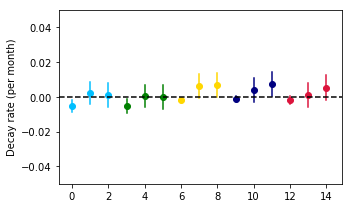

In [69]:
#just show estimated decay rates

plt.figure(figsize=(5,3))
for i in range(len(cellcolors)):
    
    #plt.subplot(141+i)
    plt.scatter(3*i,mml[3*i][0],color=cellcolors[i])
    plt.plot([3*i,3*i],[mml[3*i][1],mml[3*i][2]],color=cellcolors[i])

    plt.scatter(3*i+1,mml[3*i+1][0],color=cellcolors[i])
    plt.plot([3*i+1,3*i+1],[mml[3*i+1][1],mml[3*i+1][2]],color=cellcolors[i])

    plt.scatter(3*i+2,mml[3*i+2][0],color=cellcolors[i])
    plt.plot([3*i+2,3*i+2],[mml[3*i+2][1],mml[3*i+2][2]],color=cellcolors[i])

plt.axhline(0,ls='--',color='k')
#plt.xticks(range(8),['Viral RNA \n <1yr','Viral RNA \n >1yr', 'CD4 count \n <1yr','CD4 count \n >1yr',
#                     'Intact DNA \n <1yr','Intact DNA \n >1yr','Defective DNA \n <1yr','Defective DNA \n >1yr'], rotation=90)

#plt.axhline(-np.log(2)/44,ls='-',color='gray',alpha=0.5)
#plt.annotate('44 mo half-life',[0.4,-0.02])

#plt.yticks(np.arange(-0.3,0.3,0.1))
plt.ylim([-0.05,0.05])
plt.ylabel('Decay rate (per month)')

plt.tight_layout()    
plt.savefig('figures/alldecayrates.pdf',dfpi=600)

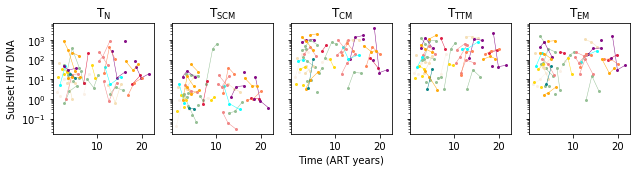

In [8]:
#plot subsets over 3 years, colored by total time on ART
#make colors based on time on ART

fig,axarr=plt.subplots(1,5,figsize=(9,2.5),sharex=True,sharey=True)
for ic,ct in enumerate(celltypes):
    ax=axarr[ic]
    for ip,p in enumerate(long_df['pat_id'].unique()):
        tdf=long_df[(long_df['pat_id']==p) & (long_df['celltype']==ct)]
        
        z=tdf['preART_months'].iloc[0]
    
        if z<1:
            cz='linen'
        elif z<2:
            cz='wheat'
        elif z<3:
            cz='gold'
        elif z<6:
            cz='darkseagreen'
        elif z<12:
            cz='teal'
        elif z<24:
            cz='aqua'
        elif z<3*12:
            cz='orange'
        elif z<5*12:
            cz='lightcoral'
        elif z<7*12:
            cz='coral'
        elif z<10*12:
            cz='crimson'
        else:
            cz='purple'
        
        ax.semilogy(tdf['time_postART_years'],tdf['DNApmCD4'],ls='-',marker='o',lw=0.5,markersize=2,alpha=0.9,color=cz)
        
    ax.set_title(cellnames[ic])

axarr[2].set_xlabel('Time (ART years)')
axarr[0].set_ylabel('Subset HIV DNA')
#axarr[0].set_xticks(range(5))
#axarr[0].set_xlim([-0.3,3.3])

plt.tight_layout()    
plt.savefig('figures/subsetHIVDNAcoloredbyARTtime2.pdf',dpi=600)

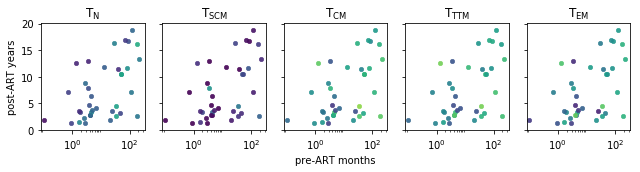

In [9]:
#plot subsets over 3 years, colored by total time on ART
#make colors based on time on ART

fig,axarr=plt.subplots(1,5,figsize=(9,2.5),sharex=True,sharey=True)
for ic,ct in enumerate(celltypes):
    ax=axarr[ic]
    for ip,p in enumerate(long_df['pat_id'].unique()):
        tdf=long_df[(long_df['pat_id']==p) & (long_df['celltype']==ct)]
        
        x=tdf['preART_months'].iloc[0]
        y=tdf['time_postART_years'].iloc[0]
        z=np.mean(np.log10(tdf['DNApmCD4']))
        
        ax.scatter(x,y,c=z,marker='o',lw=0.5,s=20,alpha=0.9,vmin=0,vmax=4)
        
    ax.set_title(cellnames[ic])

plt.semilogx()
axarr[2].set_xlabel('pre-ART months')
axarr[0].set_ylabel('post-ART years')

plt.tight_layout()    
plt.savefig('figures/subsetHIVDNAcoloredbyARTtime3.pdf',dpi=600)

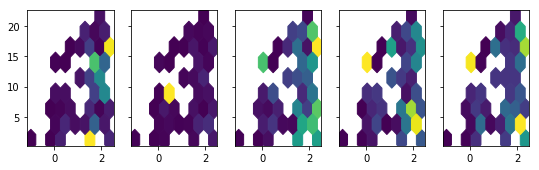

In [10]:
fig,axarr=plt.subplots(1,5,figsize=(9,2.5),sharex=True,sharey=True)
for ic,ct in enumerate(celltypes):
    ax=axarr[ic]
    tdf=long_df[(long_df['celltype']==ct)]

    x=np.log10(tdf['preART_months'])
    y=tdf['time_postART_years']
    z=tdf['DNApmCD4']/np.nanmean(tdf['DNApmCD4'])
    ax.hexbin(x,y,z,gridsize=8)#,vmin=0,vmax=5)

#plt.colorbar()
